# Images and Physical Space

## Overview

In [ ]:
# Let's import matplotlib so we can view images
from matplotlib import pyplot as plt
%matplotlib inline

# Also import NumPy for working with arrays
import numpy as np

### The primary data type is the Image

In [ ]:
import SimpleITK as sitk

image = sitk.Image()
print(image)

### Use `ReadImage()` and `WriteImage()` for IO

In [ ]:
image = sitk.ReadImage('Data/qdna1.mha')

sitk.WriteImage(image, 'qdna1.tif')
!ls -l qdna1.tif

### Spatial computations are always done in physical space

This is very important to **avoid errors** when performing registration.

![Physical space](Data/PhysicalSpace.png)

### *Origin*, *Spacing*, and *Direction* cosines define conversion from index to physical space

In [ ]:
print('Origin', image.GetOrigin())
print('Spacing', image.GetSpacing())
print('Direction', image.GetDirection())

index = (0, 3)
point = image.TransformIndexToPhysicalPoint(index)
print('\nindex', index, 'corresponds to point', point)

In [ ]:
image.SetSpacing((3.0, 5.0))
print('Spacing', image.GetSpacing())

point = image.TransformIndexToPhysicalPoint(index)
print('\nindex', index, 'corresponds to point', point)

## Tutorial

### Conversion between NumPy and SimpleITK

SimpleITK and NumPy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
NumPy: image_numpy_array[z,y,x]

#### From SimpleITK to NumPy

In [ ]:
nda = sitk.GetArrayFromImage(image)
print(image.GetSize())
print(nda.shape)

#### From NumPy to SimpleITK

Remember to to set the image's origin, spacing, and possibly direction cosine matrix. The default values may not match the physical dimensions of your image.

In [ ]:
nda = np.zeros((10,20,3))

# if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
nda_as_image = sitk.GetImageFromArray(nda)
print(nda_as_image.GetSize())

# if this is supposed to be a 2D color image [x=20,y=10]
nda_as_image = sitk.GetImageFromArray(nda, isVector=True)
print(nda_as_image.GetSize())

### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's. It has a value of -1.

The 64-bit integer types are not available on all distributions. When not available the value is `sitkUnknown`.

In [ ]:
print(image.GetPixelIDTypeAsString())
print(image.GetPixelID())
print(sitk.sitkUInt8)

## Image Construction

There are a variety of ways to create an image. 

The following components are required for a complete definition of an image:
<ol>
<li>Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.</li>
<li> Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).</li>
<li> Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.</li>
<li> Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.</li>
</ol>

Initial pixel/voxel values are set to zero.

In [ ]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

### Basic Image Attributes

You can change the image origin, spacing and direction. Making such changes to an image already containing data should be done cautiously. 

In [ ]:
image_3D.SetOrigin((78.0, 76.0, 77.0))
image_3D.SetSpacing([0.5,0.5,3.0])

print(image_3D.GetOrigin())
print(image_3D.GetSize())
print(image_3D.GetSpacing())
print(image_3D.GetDirection())

Image dimension queries:

In [ ]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

What is the depth of a 2D image?

In [ ]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

Pixel/voxel type queries: 

In [ ]:
print(image_3D.GetPixelIDValue())
print(image_3D.GetPixelIDTypeAsString())
print(image_3D.GetNumberOfComponentsPerPixel())

What is the dimension and size of a Vector image and its data?

In [ ]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())
print(image_RGB.GetNumberOfComponentsPerPixel())

### Accessing Pixels and Slicing

The Image class's member functions `GetPixel` and `SetPixel` provide an interface for pixel access.

In [ ]:
help(image_3D.GetPixel)

In [ ]:
print(image_3D.GetPixel(0, 0, 0))
image_3D.SetPixel(0, 0, 0, 1)
print(image_3D.GetPixel(0, 0, 0))

# This can also be done using pythonic notation.
print(image_3D[0,0,1])
image_3D[0,0,1] = 2
print(image_3D[0,0,1])

Slicing of SimpleITK images returns a copy of the image data, but only a subset of pixels.

The syntax is the same as NumPy arrays, which is very similar to MATLAB.

In [ ]:
# Plot the original image
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(sitk.GetArrayFromImage(image), cmap='gray')
ax.set_title('Original')

# Brute force sub-sample
image_subsampled = image[::16,::16]
ax = fig.add_subplot(1, 2, 2)
ax.imshow(sitk.GetArrayFromImage(image_subsampled), cmap='gray')
ax.set_title('Subsampled')

We can take a 2D slice of a 3D image for visualization.

In [ ]:
# Data from http://loci.wisc.edu/software/sample-data
cells = sitk.ReadImage('Data/NESb_C2_TP1.tiff')
print('Size', cells.GetSize())

cells_slice = cells[:,:,4]
print('Slice size', cells_slice.GetSize())

plt.imshow(sitk.GetArrayFromImage(cells_slice), cmap='gray')

## Exercises

### Exercise 1: Image addition and physical space

ITK does not allow pixel-based addition of images when they do not occupy the same location in physical space.

Uncomment the addition operation below, and observe the error that occurs.

Comment the `SetOrigin`, `SetSpacing`, and `SetDirection` lines.  Does the error go away? Why? Can any of these attributes be modified and addition still occur?

In [ ]:
image_a = sitk.Image(24, 24, sitk.sitkUInt8)
image_a[0,0] = 2

image_b = sitk.Image(image_a.GetSize(), sitk.sitkUInt8)
image_b.SetDirection([0, 1, 0.5, 0.5])
image_b.SetSpacing([0.5, 0.8])
image_b.SetOrigin([10.0, 20.0])
image_b[0,0] = 3

#image_c = sitk.Add(image_a, image_b)
#print(image_c[0,0])

### Exercise 2: Image physical extent

In the figure below, two images are plotted at their physical location in space.

By changing the *Origin* and *Spacing* of the image *b* only, make them occupy the same area in physical space.

*Hint*: The length of an image with spacing, $\Delta x$ and size $n$ is $n \Delta x$. For two lengths to be the same, $\Delta x_1 (n_1 - 1) = \Delta x_2 (n_2  - 1)$.

In [ ]:
def show_in_physical_space(image, column):
    fig = plt.figure()
    ax = fig.add_subplot(2, 2, column)
    first_index = (0, 0)
    left, bottom = image.TransformIndexToPhysicalPoint(first_index)
    size = image.GetSize()
    # Since indexes count from zero, we must subtract 1
    last_index = (size[0] - 1, size[1] - 1)
    right, top = image.TransformIndexToPhysicalPoint(last_index)
    extent = (left, right, bottom, top)
    print('extent', extent)
    ax.imshow(sitk.GetArrayFromImage(image), extent=extent)
    ax.set_xlim(0.0, 100.0)
    ax.set_ylim(0.0, 100.0)
    plt.show()

In [ ]:
image_a = sitk.Image(20, 20, sitk.sitkUInt8)
image_a.SetOrigin([10.0, 20.0])
image_a.SetSpacing([4.0, 2.0])

show_in_physical_space(image_a, 1)

image_b = sitk.Image(10, 10, sitk.sitkUInt8)
image_b.SetOrigin([5.0, 5.0])
image_b.SetSpacing([2.0, 1.0])

show_in_physical_space(image_b, 2)

# Resampling Images

## Overview

### Define output image information

* When resampling an image, we must first define output the image information, i.e. the *Origin*, *Spacing*, *Direction*, and *Size*.
* This determines the grid of samples where the output will be sampled.
* It does need not need to be the same as the input image.

![Resampling output information](Data/ResampleOutputInformation.png)

### Finding a resampled pixel's value

For each pixel in the output image:

1. Transform its index value to its location in physical space.
2. Apply an optional spatial transformation.
3. Transform the physical point location to a continuous index on the image to be resampled.
4. Interpolate from neighboring pixels.

![Common reference system](Data/CommonReferenceSystem.png)

### Different interpolators

<a href="http://www.itk.org/SimpleITKDoxygen/html/namespaceitk_1_1simple.html#a7cb1ef8bd02c669c02ea2f9f5aa374e5">There are many interpolators available</a>:
<ul>
<li> sitkNearestNeighbor </li>
<li> sitkLinear </li>
<li> sitkBSpline </li>
<li> sitkGaussian </li>
<li> sitkHammingWindowedSinc </li>
<li> sitkCosineWindowedSinc </li>
<li> sitkWelchWindowedSinc </li>
<li> sitkLanczosWindowedSinc </li>
<li> sitkBlackmanWindowedSinc </li>
</ul>

### Resampling and the registration framework

**Registration** involves **sampling** the two images to be registered with at **spatial transform**. The sampled values are compared with a **similarity metric**.  An **optimizer** is used to improve the spatial transformation parameters iteratively until the samples coorespond.

![Registration framework](Data/ITKv4RegistrationComponentsDiagram.svg)

## Tutorial

In [ ]:
import SimpleITK as sitk

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

Read a 3D input image.

In [ ]:
input_image = sitk.ReadImage('Data/NESb_C2_TP1.tiff')
print(input_image.GetSize())

View one of its slices.

In [ ]:
input_slice = input_image[:,:,4]
plt.imshow(sitk.GetArrayFromImage(input_slice), cmap='gray')

Create a resampler.

In [ ]:
resampler = sitk.ResampleImageFilter()

What are the options that can be set on the `resampler`?

In [ ]:
# Uncomment the line below and place the cursor after the "t" in "Set"
# Then, press the TAB key.
#resampler.Set

We can either set use a *reference image* to determine the output image pixel sampling grid, or we can set desired output image information manually.

Here we will make the output image size half of the input image size in each direction.

In [ ]:
origin = input_image.GetOrigin()
resampler.SetOutputOrigin(origin)

direction = input_image.GetDirection()
resampler.SetOutputDirection(direction)

spacing = input_image.GetSpacing()
resampler.SetOutputSpacing(spacing)

size = list(input_image.GetSize())
size[0] = int(size[0] / 2)
size[1] = int(size[1] / 2)
resampler.SetSize(size)
print(size)

In [ ]:
resampled_image = resampler.Execute(input_image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,4]), cmap='gray')

We can also apply a spatial transform in the resampling process.

In [ ]:
dimension = 3
translation = (-100.0, -200.0, 0.0)
transform = sitk.TranslationTransform(dimension, translation)
resampler.SetTransform(transform)

In [ ]:
resampled_image = resampler.Execute(input_image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,4]), cmap='gray')

When the input image is sampled outside of its domain, a *default pixel value* is returned.

In [ ]:
resampler.SetDefaultPixelValue(150)

In [ ]:
resampled_image = resampler.Execute(input_image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,4]), cmap='gray')

Finally, we can also change the interpolator used.  The default is a bi-linear interpolator for 2D images and a tri-linear interpolator for 3D images.

In [ ]:
resampler.SetInterpolator(sitk.sitkNearestNeighbor)

In [ ]:
resampled_image = resampler.Execute(input_image)
plt.imshow(sitk.GetArrayFromImage(resampled_image[:,:,4]), cmap='gray')

## Exercises

### Exercise 1: Windowed Sinc

Run the `resampler` with the `sitk.sitkWelchWindowedSinc` interpolator.  What is different?

### Exercise 2: Interpolator behavior

The behavior of different interpolators is demonstrated on the <a href="http://www.cs.cornell.edu/~srm/publications/Vis94-filters-abstract.html">Marschner-Lobb</a> image with the code below.

Which interpolators before best? Is performance related to the experiences from Exercise 1?

In [ ]:
import math

def marschner_lobb(size=40, alpha=0.25, f_M=6.0):
    img = sitk.PhysicalPointSource(sitk.sitkVectorFloat32, [size]*3, [-1]*3, [2.0/size]*3)
    imgx = sitk.VectorIndexSelectionCast(img, 0)
    imgy = sitk.VectorIndexSelectionCast(img, 1)
    imgz = sitk.VectorIndexSelectionCast(img, 2)
    del img
    r = sitk.Sqrt(imgx**2 + imgy**2)
    del imgx, imgy
    pr = sitk.Cos((2.0*math.pi*f_M)*sitk.Cos((math.pi/2.0)*r))
    ml = (1.0 - sitk.Sin((math.pi/2.0)*imgz) + alpha*(1.0+pr))/(2.0*(1.0+alpha))
    return ml[:,:,ml.GetSize()[-1]//2]

def myshow(image, title):
    arr = sitk.GetArrayFromImage(image)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(arr, cmap='gray')
    ax.set_title(title)
    
def expand(image, interpolator):
    return sitk.Expand(image, [5]*2, interpolator)

interpolators = [('Nearest Neighbor', sitk.sitkNearestNeighbor),
                 ('Linear', sitk.sitkLinear),
                 ('B-Spline', sitk.sitkBSpline),
                 ('Gaussian', sitk.sitkGaussian),
                 ('Hamming Windowed Sinc', sitk.sitkHammingWindowedSinc),
                 ('Blackman Windowed Sinc', sitk.sitkBlackmanWindowedSinc),
                 ('Cosine Windowed Sinc', sitk.sitkCosineWindowedSinc),
                 ('Welch Windowed Sinc', sitk.sitkWelchWindowedSinc),
                 ('Lanczos Windowed Sinc', sitk.sitkLanczosWindowedSinc)]

image = marschner_lobb()
for interpolator in interpolators:
    expanded = expand(image, interpolator[1])
    myshow(expanded, interpolator[0])
    

# Spatial Transformations

In [1]:
import SimpleITK as sitk
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed

## Overview

### Transformation models

There are many spatial transforms of varying complexity.

### Transform direction is from the resampled image to the input image

![Transform Direction](Data/TransformDirection.png)

This is because of the resampling process explained in the previous tutorial.

### Transformation model parameter types

Transform are defined by two sets of parameters, the **Parameters** and **FixedParameters**.  

FixedParameters are not changed during the optimization process when performing registration.

An example of FixedParameters is the center of rotation of a transformation modeling rigid body motion.

### Composite transforms

It is possible to compose multiple transform together into a single transform object.

With a **composite transform**, multiple resampling operations are prevented, so interpolation errors are not accumulated.

Composite transforms are useful in registration because a series of increasing complex transformations can be incrementally optimized.

## Tutorial

A number of different spatial transforms are available in SimpleITK.

The simplest is the Identity Transform.  This transform simply returns input points unaltered.

In [2]:
dimension = 2

print('*Identity Transform*')
identity = sitk.Transform(dimension, sitk.sitkIdentity)
print('Dimension: ' + str(identity.GetDimension()))

# Points are always defined in physical space
point = (1.0, 1.0)
def transform_point(transform, point):
    transformed_point = transform.TransformPoint(point)
    print('Point ' + str(point) + ' transformed is ' + str(transformed_point))

transform_point(identity, point)

*Identity Transform*
Dimension: 2
Point (1.0, 1.0) transformed is (1.0, 1.0)


For the TranslationTransform, the Parameters are the values of the translation Offset.

In [3]:
print('*Translation Transform*')
translation = sitk.TranslationTransform(dimension)

print('Parameters: ' + str(translation.GetParameters()))
print('Offset:     ' + str(translation.GetOffset()))
print('FixedParameters: ' + str(translation.GetFixedParameters()))
transform_point(translation, point)

print('')
translation.SetParameters((3.1, 4.4))
print('Parameters: ' + str(translation.GetParameters()))
transform_point(translation, point)

*Translation Transform*
Parameters: (0.0, 0.0)
Offset:     (0.0, 0.0)
FixedParameters: ()
Point (1.0, 1.0) transformed is (1.0, 1.0)

Parameters: (3.1, 4.4)
Point (1.0, 1.0) transformed is (4.1, 5.4)


The affine transform is capable of representing translations, rotations, shearing, and scaling.

In [4]:
print('*Affine Transform*')
affine = sitk.AffineTransform(dimension)

print('Parameters: ' + str(affine.GetParameters()))
print('FixedParameters: ' + str(affine.GetFixedParameters()))
transform_point(affine, point)

print('')
affine.SetTranslation((3.1, 4.4))
print('Parameters: ' + str(affine.GetParameters()))
transform_point(affine, point)

*Affine Transform*
Parameters: (1.0, 0.0, 0.0, 1.0, 0.0, 0.0)
FixedParameters: (0.0, 0.0)
Point (1.0, 1.0) transformed is (1.0, 1.0)

Parameters: (1.0, 0.0, 0.0, 1.0, 3.1, 4.4)
Point (1.0, 1.0) transformed is (4.1, 5.4)


### Applying Transforms to Images

Create a function to display the images that is aware of image spacing.

In [6]:
def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
        
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(title, figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], 0, ysize*spacing[0])
    
    t = ax.imshow(nda,
            extent=extent,
            interpolation='hamming',
            cmap='gray',
            origin='lower')
    
    if(title):
        plt.title(title)

Create a grid image.

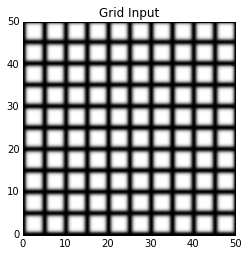

In [7]:
grid = sitk.GridSource(outputPixelType=sitk.sitkUInt16,
    size=(250, 250),
    sigma=(0.5, 0.5),
    gridSpacing=(5.0, 5.0),
    gridOffset=(0.0, 0.0),
    spacing=(0.2,0.2))
myshow(grid, 'Grid Input')

To apply the transform, a resampling operation is required.

Point (1.0, 1.0) transformed is (4.1, 5.6)


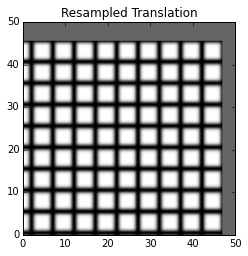

In [10]:
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 100.0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

translation.SetOffset((3.1, 4.6))
transform_point(translation, point)
resampled = resample(grid, translation)
myshow(resampled, 'Resampled Translation')

What happened?  The translation is positive in both directions.  Why does the output image move down and to the left?  It important to keep in mind that a transform in a resampling operation defines *the transform from the output space to the input space*.

Point (1.0, 1.0) transformed is (-2.1, -3.5999999999999996)


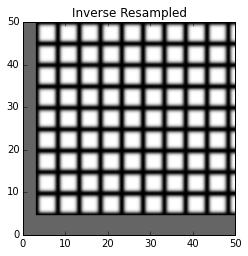

In [11]:
translation.SetOffset(-1*np.array(translation.GetParameters()))
transform_point(translation, point)
resampled = resample(grid, translation)
myshow(resampled, 'Inverse Resampled')

An affine (line preserving) transformation, can perform translation:

<SimpleITK.SimpleITK.AffineTransform; proxy of <Swig Object of type 'itk::simple::AffineTransform *' at 0x7efda7d5bae0> >

<function __main__.affine_translate>

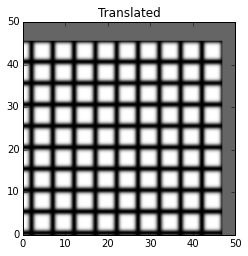

In [13]:
def affine_translate(transform, x_translation=3.1, y_translation=4.6):
    new_transform = sitk.AffineTransform(transform)
    new_transform.SetTranslation((x_translation, y_translation))
    resampled = resample(grid, new_transform)
    myshow(resampled, 'Translated')
    return new_transform
    
affine = sitk.AffineTransform(dimension)

interact(affine_translate, transform=fixed(affine), x_translation=(-5.0, 5.0), y_translation=(-5.0, 5.0))

or scaling:

[[ 3.   0. ]
 [ 0.   0.7]]


<SimpleITK.SimpleITK.AffineTransform; proxy of <Swig Object of type 'itk::simple::AffineTransform *' at 0x7efda7d5b600> >

<function __main__.affine_scale>

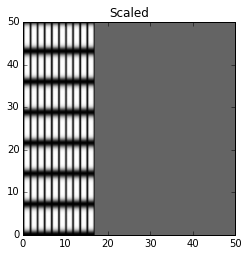

In [14]:
def affine_scale(transform, x_scale=3.0, y_scale=0.7):
    new_transform = sitk.AffineTransform(transform)
    matrix = np.array(transform.GetMatrix()).reshape((dimension,dimension))
    matrix[0,0] = x_scale
    matrix[1,1] = y_scale
    new_transform.SetMatrix(matrix.ravel())
    resampled = resample(grid, new_transform)
    myshow(resampled, 'Scaled')
    print(matrix)
    return new_transform

affine = sitk.AffineTransform(dimension)

interact(affine_scale, transform=fixed(affine), x_scale=(0.2, 5.0), y_scale=(0.2, 5.0))

or rotation:

[[ 0.96592583  0.25881905]
 [-0.25881905  0.96592583]]


<SimpleITK.SimpleITK.AffineTransform; proxy of <Swig Object of type 'itk::simple::AffineTransform *' at 0x7efda7d5b8d0> >

<function __main__.affine_rotate>

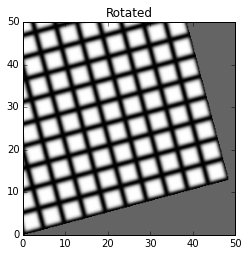

In [15]:
def affine_rotate(transform, degrees=15.0):
    parameters = np.array(transform.GetParameters())
    new_transform = sitk.AffineTransform(transform)
    matrix = np.array(transform.GetMatrix()).reshape((dimension,dimension))
    radians = -np.pi * degrees / 180.
    rotation = np.array([[np.cos(radians), -np.sin(radians)],[np.sin(radians), np.cos(radians)]])
    new_matrix = np.dot(rotation, matrix)
    new_transform.SetMatrix(new_matrix.ravel())
    resampled = resample(grid, new_transform)
    print(new_matrix)
    myshow(resampled, 'Rotated')
    return new_transform
    
affine = sitk.AffineTransform(dimension)

interact(affine_rotate, transform=fixed(affine), degrees=(-90.0, 90.0))

or shearing:

[[ 1.  -0.3]
 [-0.1  1. ]]


<SimpleITK.SimpleITK.AffineTransform; proxy of <Swig Object of type 'itk::simple::AffineTransform *' at 0x7efda6c031b0> >

<function __main__.affine_shear>

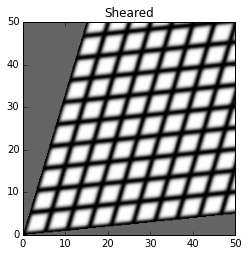

In [16]:
def affine_shear(transform, x_shear=0.3, y_shear=0.1):
    new_transform = sitk.AffineTransform(transform)
    matrix = np.array(transform.GetMatrix()).reshape((dimension,dimension))
    matrix[0,1] = -x_shear
    matrix[1,0] = -y_shear
    new_transform.SetMatrix(matrix.ravel())
    resampled = resample(grid, new_transform)
    myshow(resampled, 'Sheared')
    print(matrix)
    return new_transform

affine = sitk.AffineTransform(dimension)

interact(affine_shear, transform=fixed(affine), x_shear=(0.1, 2.0), y_shear=(0.1, 2.0))

## Composite Transform

It is possible to compose multiple transform together into a single transform object.  With a composite transform, multiple resampling operations are prevented, so interpolation errors are not accumulated.  For example, an affine transformation that consists of a translation and rotation,

[[ 0.93969262  0.34202014]
 [-0.34202014  0.93969262]]


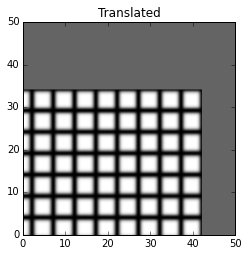

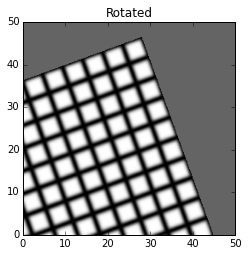

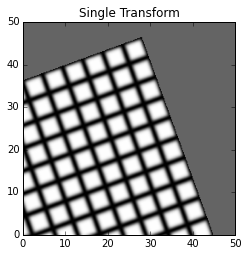

In [17]:
translate = (8.0, 16.0)
rotate = 20.0

affine = sitk.AffineTransform(dimension)
affine = affine_translate(affine, translate[0], translate[1])
affine = affine_rotate(affine, rotate)

resampled = resample(grid, affine)
myshow(resampled, 'Single Transform')

can also be represented with two Transform objects applied in sequence with a Composite Transform,

[[ 0.93969262  0.34202014]
 [-0.34202014  0.93969262]]


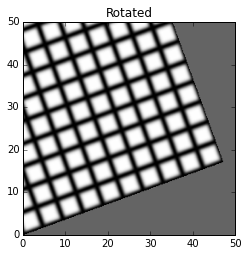

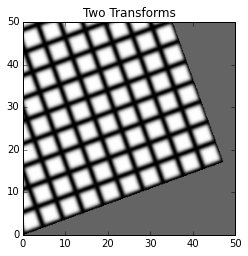

In [21]:
translation = sitk.TranslationTransform(dimension)
translation.SetOffset(-1*np.array(translate))
composite = sitk.Transform(dimension, sitk.sitkComposite)
composite.AddTransform(translation)
affine = sitk.AffineTransform(dimension)
affine = affine_rotate(affine, rotate)

composite.AddTransform(translation)
composite = sitk.Transform(dimension, sitk.sitkComposite)
composite.AddTransform(affine)

resampled = resample(grid, composite)
myshow(resampled, 'Two Transforms')

*Beware*, tranforms are noncommutative -- order matters!

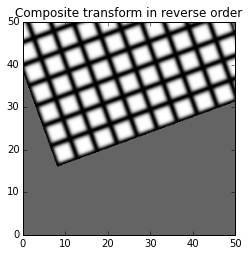

In [22]:
composite = sitk.Transform(dimension, sitk.sitkComposite)
composite.AddTransform(affine)
composite.AddTransform(translation)

resampled = resample(grid, composite)
myshow(resampled, 'Composite transform in reverse order')

## Exercise

### Exercise 1: Transform complexity

Below is a list of transforms supported, ordered by their complexity. Choose three, and compare how many Parameters they have.


<table width="100%">
<tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1TranslationTransform.html">TranslationTransform</a></td><td>2D or 3D, translation</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1VersorTransform.html">VersorTransform</a></td><td>3D, rotation represented by a versor</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1VersorRigid3DTransform.html">VersorRigid3DTransform</a></td><td>3D, rigid transformation with rotation represented by a versor</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Euler2DTransform.html">Euler2DTransform</a></td><td>2D, rigid transformation with rotation represented by a Euler angle</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Euler3DTransform.html">Euler3DTransform</a></td><td>3D, rigid transformation with rotation represented by Euler angles</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Similarity2DTransform.html">Similarity2DTransform</a></td><td>2D, composition of isotropic scaling and rigid transformation with rotation represented by a Euler angle</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1Similarity3DTransform.html">Similarity3DTransform</a></td><td>3D, composition of isotropic scaling and rigid transformation with rotation represented by a versor</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1ScaleTransform.html">ScaleTransform</a></td><td>2D or 3D, anisotropic scaling</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1ScaleVersor3DTransform.html">ScaleVersor3DTransform</a></td><td>3D, rigid transformation and anisotropic scale is <bf>added</bf> to the rotation matrix part (not composed as one would expect)</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1ScaleSkewVersor3DTransform.html">ScaleSkewVersor3DTransform</a></td><td>3D, rigid transformation with anisotropic scale and skew matrices <bf>added</bf> to the rotation matrix part (not composed as one would expect)</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1AffineTransform.html">AffineTransform</a></td><td>2D or 3D, affine transformation.</td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1BSplineTransform.html">BSplineTransform</a></td><td>2D or 3D, deformable transformation represented by a sparse regular grid of control points. </td></tr>
  <tr><td><a href="http://www.itk.org/Doxygen/html/classitk_1_1DisplacementFieldTransform.html">DisplacementFieldTransform</a></td><td>2D or 3D, deformable transformation represented as a dense regular grid of vectors.</td></tr>
  <tr><td><a href="http://www.itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1Transform.html">Transform</a></td>
  <td>A generic transformation. Can represent any of the SimpleITK transformations, and a <b>composite transformation</b> (stack of transformations concatenated via composition, last added, first applied). </td></tr>
  </table>